In [400]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from icecream import ic
from pathlib import Path
from scipy.special import expit
import random
from sklearn.model_selection import train_test_split
from itertools import chain
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy import linalg

In [401]:
RANDOM_STATE = 21

In [402]:
random.seed(RANDOM_STATE)

In [403]:
def calculate_vif_(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"dropping {X.iloc[:, variables].columns[maxloc]} at index: {maxloc}")
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [404]:
def drop_correlated(X, thresh = 0.95):
    # Create correlation matrix
    corr_matrix = X.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    print("To drop")
    print(to_drop)
    # Drop features 
    X.drop(to_drop, axis=1, inplace=True)
    return X

## Preparing the first data set (German credit data)

In [439]:
scaler = MinMaxScaler()
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
df = pd.read_csv("german.data", delimiter=' ', header=None, names = names)
df.dropna(inplace = True) #drops 3 observations
df = pd.get_dummies(df, drop_first = True)
y1 = df.classification.to_numpy()-1
X1 = df.drop("classification", axis = 1)
#X1 = drop_correlated(X1, thresh=0.95)
X1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
X1 = calculate_vif_(X1, thresh = 10).to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

dropping job_A173 at index: 44
dropping credithistory_A32 at index: 11
dropping statussex_A93 at index: 31
Remaining variables:
Index(['duration', 'creditamount', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking_A12',
       'existingchecking_A13', 'existingchecking_A14', 'credithistory_A31',
       'credithistory_A33', 'credithistory_A34', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A62',
       'savings_A63', 'savings_A64', 'savings_A65', 'employmentsince_A72',
       'employmentsince_A73', 'employmentsince_A74', 'employmentsince_A75',
       'statussex_A92', 'statussex_A94', 'otherdebtors_A102',
       'otherdebtors_A103', 'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A142', 'otherinstallmentplans_A143',
       'housing_A152', 'housing_A153', 'job_A172', 'job_A174',
       'telepho

In [446]:
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
df = pd.read_csv("german.data", delimiter=' ', header=None, names = names)
df.dropna(inplace = True) #drops 3 observations
df = pd.get_dummies(df, drop_first = True)
y1 = df.classification.to_numpy()-1
X1 = df.drop("classification", axis = 1)
#X1 = drop_correlated(X1, thresh=0.95)
x1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
for c in x1.columns:
    print(x1[c].unique())

[0.02941176 0.64705882 0.11764706 0.55882353 0.29411765 0.47058824
 0.38235294 0.16176471 0.07352941 0.08823529 0.04411765 0.82352941
 0.20588235 0.60294118 0.10294118 0.33823529 0.05882353 0.73529412
 0.23529412 0.14705882 0.42647059 0.25       0.17647059 0.
 0.63235294 0.13235294 0.26470588 0.51470588 0.35294118 0.01470588
 0.32352941 1.         0.52941176]
[0.05056674 0.31368989 0.10157368 0.41994057 0.25420931 0.48448333
 0.14223616 0.36854848 0.15456146 0.27423792 0.05749972 0.22328601
 0.07246616 0.05221745 0.06344228 0.05678442 0.11962144 0.43039507
 0.67838671 0.17497524 0.10366458 0.13189171 0.10955211 0.08550677
 0.10008804 0.06184659 0.00968416 0.00874876 0.11912622 0.36238583
 0.09150435 0.2074392  0.30901288 0.05579399 0.06734896 0.24738638
 0.32243865 0.10179377 0.05364807 0.01144492 0.11461428 0.04996148
 0.32761087 0.32667547 0.32425443 0.06289204 0.11274348 0.06063607
 0.3839551  0.10030813 0.31446022 0.05568394 0.17211401 0.10867173
 0.02932761 0.34213712 0.51260042 0

## Preparing the second dataset (banknote authentication)

In [406]:
df = pd.read_csv("data_banknote_authentication.txt", header=None)
df.rename(columns = {0:"Variance", 1:"Skewness", 2:"Curtosis", 3:"Entropy", 4:"Inauthentic" }, inplace = True)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df.Inauthentic.to_numpy()
X1 = df.drop("Inauthentic", axis = 1)
X1 = drop_correlated(X1, thresh=0.90)
X1 = calculate_vif_(X1, thresh=5).to_numpy()
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

To drop
[]
Remaining variables:
Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')


## Preparing the third dataset (ionosphere)

In [407]:
df = pd.read_csv("ionosphere.data", header=None)
df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True)
y1 = df['34_g'].to_numpy()
df = df.drop('34_g', axis = 1)
X1 = df.drop(1, axis = 1)
X1 = calculate_vif_(X1, thresh=5)
X1 = drop_correlated(X1).to_numpy()
X3_train, X3_test, y3_train, y3_test = train_test_split(X1, y1, train_size = 0.8, random_state = RANDOM_STATE, stratify = y1)

dropping 14 at index: 13
dropping 8 at index: 7
dropping 20 at index: 17
dropping 4 at index: 3
dropping 16 at index: 12
dropping 6 at index: 4
Remaining variables:
Index([ 0,  2,  3,  5,  7,  9, 10, 11, 12, 13, 15, 17, 18, 19, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype='object')
To drop
[]


## Preparing the fourth data set (Coke data)

In [408]:
df = pd.read_excel("coke-data.xls")
y2 = df.coke.to_numpy()
X2 = df.drop("coke", axis = 1)
X2 = calculate_vif_(X2, thresh = 10).to_numpy()
X4_train, X4_test, y4_train, y4_test = train_test_split(X2, y2, train_size = 0.8, random_state = RANDOM_STATE, stratify = y2)

dropping pr_coke at index: 1
Remaining variables:
Index(['pr_pepsi', 'disp_pepsi', 'disp_coke', 'pratio'], dtype='object')


## Preparing the fifth data set (Phone contract data)

In [409]:
df = pd.read_excel("phoneContract-data.xlsx")
df.drop("lp", axis = 1, inplace = True)
y3 = df.y_1_0.to_numpy()
X3 = df.drop("y_1_0", axis = 1)
X3 = calculate_vif_(X3, thresh = 10).to_numpy()
X5_train, X5_test, y5_train, y5_test = train_test_split(X3, y3, train_size = 0.8, random_state = RANDOM_STATE, stratify = y3)

Remaining variables:
Index(['plec', 'wiek', 'koszt', 'telefon', 'przywią-zanie', 'druga_ umowa'], dtype='object')


## Logit implementation

In [476]:
class logit():
    def __init__(self, exog, endog, add_intercept = True):
        if len(endog.shape) > 1:
            self.y = endog # T x 1
        elif len(endog.shape) == 1:
            self.y = endog.reshape(-1,1)
        if add_intercept == True:
            self.X = np.concatenate((np.zeros(shape = (exog.shape[0], 1)), exog), axis = 1) # T x k
        elif add_intercept == False:
            self.X = exog
        #self.b = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y # k x 1, initialized with LS estimator
        if self.y.shape[1] == 1:
            self.b = np.random.normal(size = (self.X.shape[1],1))
            #self.b = np.zeros(shape = (self.X.shape[1],1))
            self.multiclass = 0
        elif self.y.shape[1] > 1:# b - k x J (where J - number or classes)
            self.b = np.random.normal(size = (self.X.shape[1], self.y.shape[1]))
            self.multiclass = 1
            

    
    def sigmoid(x): # returns output with the same dimensions as x 
        return 1 / (1 + expit(-x))
    
    def cross_entrophy(y_true, y_pred): #returns a scalar value
        # epsilon = 1e-5 ? why?
        return -np.sum(y_true * np.log(y_pred, out=np.zeros_like(y_pred), where=(y_pred!=0)) + (1 - y_true) * np.log(1 - y_pred, out=np.zeros_like(1-y_pred), where=(1-y_pred!=0)))
    
    def cross_entrophy_der(X, y, b): # returns X.shape[0] x k vector 
        p_hat = logit.sigmoid(X @ b) # T x 1
        return X * (p_hat - y)  # X.shape[0] x k
  
    def softmax(x):
        # Compute softmax values for each sets of scores in x.
        e_x = expit(x - np.max(x))
        return e_x / e_x.sum(axis = 0)
    
    def loglikelihood_multiclass(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return np.sum(((X @ b) * y)[:,:-1]) - np.sum(np.log(1 + np.sum(expit(X @ b[:,:-1]), axis = 1)))
                                                   
    def loglikelihood_multiclass_der(X, y, b):
        # X - T x k
        # y - T x J
        # b - k x J
        return X.T @ (y - logit.softmax(X @ b))[:,:-1]
    
    def predict_proba(self, X): # returns X.shape[0] x 1 vector
        if self.multiclass == 1:
            return logit.softmax(X @ self.b)
        else:
            return logit.sigmoid(X @ self.b)
        
    def predict_y(self, X, threshold = 0.5): # returns X.shape[0] x 1 vector
        X = np.concatenate((np.ones(shape = (X.shape[0], 1)), X), axis = 1)
        p_hat = 1 / (1 + np.exp( - X @ self.b))
        if self.multiclass==0:
            return np.array([1 if i[0] > threshold else 0 for i in p_hat])
        else:
            results = np.zeros(shape=p_hat.shape)
            for i in range(0, len(p_hat)):
                results[i][np.argmax(p_hat[i])] = 1
            return results
    
    
    def accuracy(self, y, y_hat):
        truths = y_hat == y
        ts = [np.prod(t) for t in truths]
        correct_num = np.sum(ts)
        return correct_num / y.shape[0]

    def recall(self, y, y_hat):
        
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y[y_hat != y]
            false_negatives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_negatives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_negatives += np.sum(different[different == mask])
        return true_positives/(false_negatives+true_positives)
    
    def precision(self, y, y_hat):
        if not self.multiclass:
            same = y[y_hat == y]
            true_positives = np.sum(same[same == 1])
            different = y_hat[y_hat != y]
            false_positives = np.sum(different[different == 1])
        else:
            true_positives = 0
            false_positives = 0
            truths = y_hat == y
            ts = [np.prod(t) for t in truths]
            same = y[ts]
            fs = [not np.prod(t) for t in truths]
            different = y_hat[fs]
            for i in range(0, self.y.shape[1]):
                mask = np.zeros(shape=(self.y.shape[1]))
                mask[i] = 1
                true_positives += np.sum(same[same == mask])
                false_positives += np.sum(different[different == mask])
        return true_positives/(false_positives+true_positives)
    
    def f_measure(self, y, y_hat):
        precision = self.precision(y, y_hat)
        recall = self.recall(y, y_hat)
        return 2 * ( precision * recall) / (precision + recall)
    
    def r2(self, y):
        p_hat = logit.sigmoid(self.X @ self.b)
        lnL1 = logit.cross_entrophy(self.y, p_hat)
        y_hat = np.mean(y)
        lnL2 = y_hat * np.log(y_hat) + (1 - y_hat) * np.log(1 - y_hat)
        return 1-lnL1/lnL2
    
    
    def fit(self, stop_condition = 0.001, lr = 0.001, method = "GD", verbose = False,
           max_iter = 300):
        # list with losses obtained when running the learing process
        loss = []
        betas = []
        # p - vector of probabilities, shape T x 1
        p = logit.sigmoid(self.X @ self.b)
        loss.append(logit.cross_entrophy(self.y, p))
        betas.append(self.b)
        # condition (when satisfied algorithm will stop)
        cond = 1
        # iteration counter
        i = 1
        
        
        while cond > stop_condition and i < max_iter:
        #while i < max_iter:
            
            if method == "GD":
                if self.multiclass == 1:
                    gradient = logit.loglikelihood_multiclass_der(self.X, self.y, self.b) / X.shape[0]
                    print(gradient.shape, self.y.shape)
                    gradient = np.append(gradient, np.zeros(shape = (gradient.shape[0],1)), axis = 1)  
                else:
                    gradient = np.mean(logit.cross_entrophy_der(self.X, self.y, self.b), axis = 0).reshape(-1,1)
                    
                # updating weights
                beta_old = self.b
                self.b = beta_old - lr * gradient
                betas.append(self.b)
                
                # update the value of condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                #print(cond)

                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                if self.multiclass == 1:
                    loss.append(logit.loglikelihood_multiclass(self.X, self.y, self.b))
                else:
                    loss.append(logit.cross_entrophy(self.y, p))
                    
            
            elif method == "SGD":
                for j in range(self.X.shape[0]):
                    gradient = logit.cross_entrophy_der(self.X[j,:].reshape(1,-1), self.y[j,:], self.b).reshape(-1,1)
                    beta_old = self.b
                    self.b = beta_old - lr * gradient
                    cond = np.max(np.abs((beta_old - self.b) / beta_old))
                    
                    # loss function after one calculation
                    betas.append(self.b)       
                    p = logit.sigmoid(self.X @ self.b)
                    
                    if cond < stop_condition:
                        print("Breaking")
                        break
                loss.append(logit.cross_entrophy(self.y, p))
                
            elif method == "IRLS":
                p = logit.sigmoid(self.X @ self.b).reshape(-1,1)
                W = p * (1 - p)# vector
                X_temp = W * self.X
                beta_old = self.b
                matrix = self.X.T @ X_temp
                if np.linalg.det(matrix) != 0:
                    self.b = self.b + np.linalg.inv(matrix) @ self.X.T @ (self.y - p)
                else:
                    self.b = self.b + np.linalg.pinv(matrix) @ self.X.T @ (self.y - p)
                betas.append(self.b)
                # updating condition
                cond = np.max(np.abs((beta_old - self.b) / beta_old))
                # loss function after one iteration
                p = logit.predict_proba(self, self.X)
                loss.append(logit.cross_entrophy(self.y, p))
                
                
                
            if verbose == True:
                print("iteration", i, "loss function value =", loss[-1])
                
            i+=1
        return loss, betas
    

## Loss comparison - influence of learning rate and number of iterations

In [472]:
rates = list(chain.from_iterable([ [0.1/(2**i), 0.05/(2**i)] for i in range(2, 5)]))

In [413]:
iters = list(chain.from_iterable([[5**i, 2*(5**i)] for i in range(2, 5)]))

In [484]:
losses1=[]
losses2=[]
losses3=[]
losses4=[]
losses5=[]
for i in range(0, len(rates)):
    model1 = logit(X1_train, y1_train ,add_intercept = True)
    loss1, betas1 = model1.fit(method = "GD", verbose = False, max_iter = 50, lr = rates[i],stop_condition = 0.0000000001)
    model2 = logit(X2_train, y2_train ,add_intercept = True)
    loss2, betas2 = model2.fit(method = "GD", verbose = False, max_iter = 50, lr = rates[i],stop_condition = 0.0000000001)
    model3 = logit(X3_train, y3_train ,add_intercept = True)
    loss3, betas3 = model3.fit(method = "GD", verbose = False, max_iter = 50, lr = rates[i],stop_condition = 0.0000000001)
    model4 = logit(X4_train, y4_train ,add_intercept = True)
    loss4, betas4 = model4.fit(method = "GD", verbose = False, max_iter = 50, lr = rates[i],stop_condition = 0.0000000001)
    model5 = logit(X5_train, y5_train ,add_intercept = True)
    loss5, betas5 = model5.fit(method = "GD", verbose = False, max_iter = 50, lr = rates[i],stop_condition = 0.0000000001)
    losses1.append(loss1)
    losses2.append(loss2)
    losses3.append(loss3)
    losses4.append(loss4)
    losses5.append(loss5)

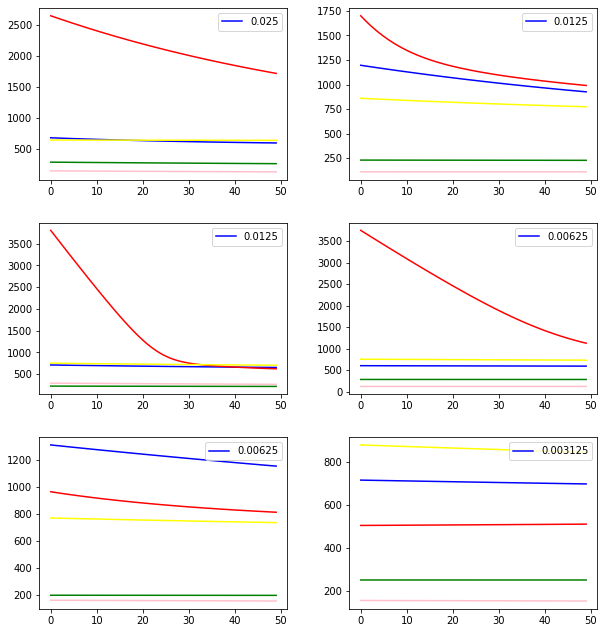

In [485]:
plt.rcParams['figure.figsize'] = [14, 8]
fig = plt.figure(figsize=(10, 15))
grid = plt.GridSpec(4, 2, wspace = .25, hspace = .25)
for i in range(0, len(iters)):
    plt.subplot(grid[i])
    plt.plot(losses1[i], color="blue")
    plt.plot(losses2[i], color="red")
    plt.plot(losses3[i], color="green")
    plt.plot(losses4[i], color="yellow")
    plt.plot(losses5[i], color="pink")
    plt.legend([rates[i]])
plt.show()

In [486]:
losses1=[]
losses2=[]
losses3=[]
losses4=[]
losses5=[]
for i in range(0, len(iters)):
    model1 = logit(X1_train, y1_train ,add_intercept = True)
    loss1, betas1 = model1.fit(method = "GD", verbose = False, max_iter = iters[i],stop_condition = 0.00000001, lr = 0.005)
    model2 = logit(X2_train, y2_train ,add_intercept = True)
    loss2, betas2 = model2.fit(method = "GD", verbose = False, max_iter = iters[i], stop_condition = 0.00000001,lr = 0.005)
    model3 = logit(X3_train, y3_train ,add_intercept = True)
    loss3, betas3 = model3.fit(method = "GD", verbose = False, max_iter = iters[i], stop_condition = 0.00000001,lr = 0.005)
    model4 = logit(X4_train, y4_train ,add_intercept = True)
    loss4, betas4 = model4.fit(method = "GD", verbose = False, max_iter = iters[i], stop_condition = 0.00000001,lr = 0.005)
    model5 = logit(X5_train, y5_train ,add_intercept = True)
    loss5, betas5 = model5.fit(method = "GD", verbose = False, max_iter = iters[i], stop_condition = 0.00000001,lr = 0.005)
    losses1.append(loss1)
    losses2.append(loss2)
    losses3.append(loss3)
    losses4.append(loss4)
    losses5.append(loss5)

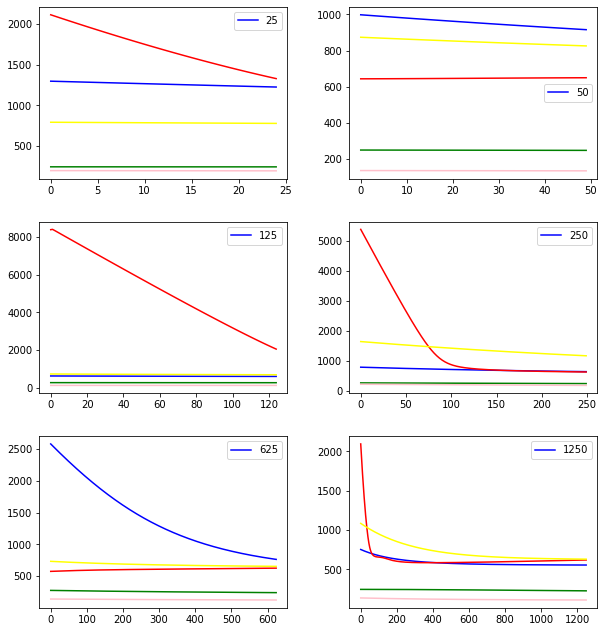

In [487]:
plt.rcParams['figure.figsize'] = [14, 8]
fig = plt.figure(figsize=(10, 15))
grid = plt.GridSpec(4, 2, wspace = .25, hspace = .25)
for i in range(0, len(iters)):
    plt.subplot(grid[i])
    plt.plot(losses1[i],color="blue")
    plt.plot(losses2[i], color="red")
    plt.plot(losses3[i], color="green")
    plt.plot(losses4[i], color="yellow")
    plt.plot(losses5[i], color="pink")
    plt.legend([iters[i]])
plt.show()

In [488]:
losses=np.zeros(shape=[16, 16])
for i in range(0, len(iters)):
    for j in range(0, len(rates)):
        model1 = logit(X1_train, y1_train ,add_intercept = True)
        loss1, betas1 = model1.fit(method = "GD", verbose = False, max_iter = iters[i], lr = rates[j])
        y_hat = model1.predict_y(X1_test)
        print("Rate:", j)
        print("Iterations:", i)
        print("Loss:", loss1[-1])
        print("GD accuracy:", model1.accuracy(y_hat, y1_test))
        losses[i][j]=loss1[-1]
losses

Rate: 0
Iterations: 0
Loss: 663.5989805006423
GD accuracy: 0.635
Rate: 1
Iterations: 0
Loss: 574.3657118629153
GD accuracy: 0.7
Rate: 2
Iterations: 0
Loss: 738.9569301791194
GD accuracy: 0.51
Rate: 3
Iterations: 0
Loss: 786.1084140034405
GD accuracy: 0.5
Rate: 4
Iterations: 0
Loss: 894.8434012741752
GD accuracy: 0.58
Rate: 5
Iterations: 0
Loss: 1635.4064926573192
GD accuracy: 0.31
Rate: 0
Iterations: 1
Loss: 638.0411216769005
GD accuracy: 0.67
Rate: 1
Iterations: 1
Loss: 1805.552798171793
GD accuracy: 0.325
Rate: 2
Iterations: 1
Loss: 929.9069693014784
GD accuracy: 0.535
Rate: 3
Iterations: 1
Loss: 1184.9336298275055
GD accuracy: 0.37
Rate: 4
Iterations: 1
Loss: 1236.9457224149482
GD accuracy: 0.46
Rate: 5
Iterations: 1
Loss: 1461.363125947224
GD accuracy: 0.4
Rate: 0
Iterations: 2
Loss: 576.9181029622212
GD accuracy: 0.69
Rate: 1
Iterations: 2
Loss: 593.789445100978
GD accuracy: 0.675
Rate: 2
Iterations: 2
Loss: 750.7711599001664
GD accuracy: 0.615
Rate: 3
Iterations: 2
Loss: 751.3651

array([[ 663.5989805 ,  574.36571186,  738.95693018,  786.108414  ,
         894.84340127, 1635.40649266,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [ 638.04112168, 1805.55279817,  929.9069693 , 1184.93362983,
        1236.94572241, 1461.36312595,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [ 576.91810296,  593.7894451 ,  750.7711599 ,  751.36515564,
         998.69995702, 1076.77681107,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [ 561.5988721 ,  582.40570504,  582.69125665,  753.58937778,
         587.54921358, 1369.82875506,    0.        ,    0.        ,
           0.        ,    0.        ,    0.  

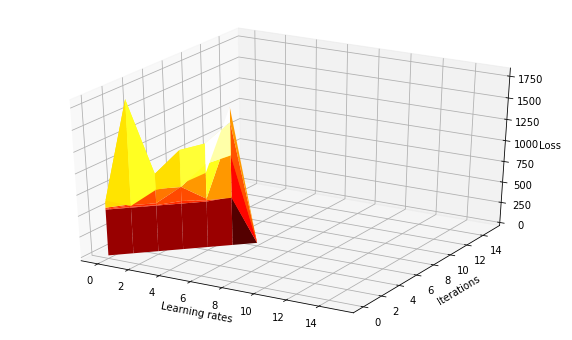

In [489]:
plt.rcParams['figure.figsize'] = [10, 6]
fig = plt.figure()
ax = plt.axes(projection='3d')
ranges = np.array([i for i in range(0,16)])
ax.plot_surface(ranges, ranges, losses, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel('Learning rates')
ax.set_ylabel('Iterations')
ax.set_zlabel('Loss');

## Metric comparisons for logit and others

In [492]:
model1 = logit(X1_train, y1_train, add_intercept = True)
loss1, betas1 = model1.fit(method = "GD", verbose = True, max_iter = 1000, lr = 0.005, stop_condition = 0.0000001)
y_hat = model1.predict_y(X1_test)
print("accuracy:", model1.accuracy(y1_test, y_hat))
print("recall:", model1.recall(y1_test, y_hat))
print("precision:", model1.precision(y1_test, y_hat))
print("F measure:", model1.f_measure(y1_test, y_hat))
print("R2 measure:", model1.f_measure(y1_test, y_hat))

iteration 1 loss function value = 880.2760107901186
iteration 2 loss function value = 878.9637629943678
iteration 3 loss function value = 877.6570727155179
iteration 4 loss function value = 876.355917557933
iteration 5 loss function value = 875.0602751868316
iteration 6 loss function value = 873.7701233285358
iteration 7 loss function value = 872.4854397707139
iteration 8 loss function value = 871.2062023626195
iteration 9 loss function value = 869.9323890153212
iteration 10 loss function value = 868.6639777019273
iteration 11 loss function value = 867.4009464578065
iteration 12 loss function value = 866.1432733807995
iteration 13 loss function value = 864.8909366314268
iteration 14 loss function value = 863.64391443309
iteration 15 loss function value = 862.4021850722662
iteration 16 loss function value = 861.165726898699
iteration 17 loss function value = 859.9345183255817
iteration 18 loss function value = 858.7085378297352
iteration 19 loss function value = 857.4877639517806
iterat

iteration 248 loss function value = 679.1168703003384
iteration 249 loss function value = 678.6539722348073
iteration 250 loss function value = 678.1929681392569
iteration 251 loss function value = 677.7338495973306
iteration 252 loss function value = 677.2766082310077
iteration 253 loss function value = 676.821235700447
iteration 254 loss function value = 676.3677237038319
iteration 255 loss function value = 675.9160639772143
iteration 256 loss function value = 675.4662482943603
iteration 257 loss function value = 675.0182684665956
iteration 258 loss function value = 674.572116342651
iteration 259 loss function value = 674.1277838085093
iteration 260 loss function value = 673.685262787252
iteration 261 loss function value = 673.244545238906
iteration 262 loss function value = 672.805623160292
iteration 263 loss function value = 672.3684885848718
iteration 264 loss function value = 671.9331335825975
iteration 265 loss function value = 671.4995502597593
iteration 266 loss function value

iteration 491 loss function value = 606.9291783189636
iteration 492 loss function value = 606.7503038556843
iteration 493 loss function value = 606.5720955911086
iteration 494 loss function value = 606.3945508095437
iteration 495 loss function value = 606.2176668076347
iteration 496 loss function value = 606.0414408943013
iteration 497 loss function value = 605.8658703906774
iteration 498 loss function value = 605.6909526300492
iteration 499 loss function value = 605.5166849577936
iteration 500 loss function value = 605.3430647313187
iteration 501 loss function value = 605.170089320002
iteration 502 loss function value = 604.9977561051314
iteration 503 loss function value = 604.8260624798446
iteration 504 loss function value = 604.6550058490698
iteration 505 loss function value = 604.484583629466
iteration 506 loss function value = 604.3147932493653
iteration 507 loss function value = 604.1456321487126
iteration 508 loss function value = 603.9770977790083
iteration 509 loss function va

iteration 753 loss function value = 576.6618431803695
iteration 754 loss function value = 576.5919099063183
iteration 755 loss function value = 576.5222177991651
iteration 756 loss function value = 576.45276596324
iteration 757 loss function value = 576.3835535064036
iteration 758 loss function value = 576.314579540031
iteration 759 loss function value = 576.2458431789985
iteration 760 loss function value = 576.1773435416665
iteration 761 loss function value = 576.1090797498658
iteration 762 loss function value = 576.0410509288822
iteration 763 loss function value = 575.9732562074414
iteration 764 loss function value = 575.9056947176948
iteration 765 loss function value = 575.8383655952041
iteration 766 loss function value = 575.7712679789272
iteration 767 loss function value = 575.7044010112035
iteration 768 loss function value = 575.637763837739
iteration 769 loss function value = 575.5713556075927
iteration 770 loss function value = 575.5051754731616
iteration 771 loss function valu

In [481]:
model1 = logit(X1_train, y1_train, add_intercept = True)
loss1, betas1 = model1.fit(method = "SGD", verbose = True, max_iter = 1000, lr = 0.00005, stop_condition = 0.0000001)
y_hat = model1.predict_y(X1_test)
print("accuracy:", model1.accuracy(y1_test, y_hat))
print("recall:", model1.recall(y1_test, y_hat))
print("precision:", model1.precision(y1_test, y_hat))
print("F measure:", model1.f_measure(y1_test, y_hat))
print("R2 measure:", model1.f_measure(y1_test, y_hat))

iteration 1 loss function value = 605.1916951835153
iteration 2 loss function value = 603.9953538151594
iteration 3 loss function value = 602.8312696997966
iteration 4 loss function value = 601.6984766193867
iteration 5 loss function value = 600.5960380164624
iteration 6 loss function value = 599.5230460288229
iteration 7 loss function value = 598.4786205653845
iteration 8 loss function value = 597.4619084211095
iteration 9 loss function value = 596.4720824289823
iteration 10 loss function value = 595.5083406470757
iteration 11 loss function value = 594.5699055788095
iteration 12 loss function value = 593.6560234245791
iteration 13 loss function value = 592.7659633629914
iteration 14 loss function value = 591.8990168600291
iteration 15 loss function value = 591.0544970045266
iteration 16 loss function value = 590.2317378684213
iteration 17 loss function value = 589.4300938903193
iteration 18 loss function value = 588.6489392809856
iteration 19 loss function value = 587.8876674494524
it

iteration 159 loss function value = 556.1005418577331
iteration 160 loss function value = 556.0639454276258
iteration 161 loss function value = 556.0281471525755
iteration 162 loss function value = 555.9931308761658
iteration 163 loss function value = 555.9588807434709
iteration 164 loss function value = 555.9253811957594
iteration 165 loss function value = 555.8926169652797
iteration 166 loss function value = 555.8605730701231
iteration 167 loss function value = 555.8292348091716
iteration 168 loss function value = 555.7985877571232
iteration 169 loss function value = 555.7686177596006
iteration 170 loss function value = 555.7393109283408
iteration 171 loss function value = 555.7106536364654
iteration 172 loss function value = 555.6826325138327
iteration 173 loss function value = 555.655234442471
iteration 174 loss function value = 555.6284465520916
iteration 175 loss function value = 555.6022562156829
iteration 176 loss function value = 555.5766510451829
iteration 177 loss function v

iteration 314 loss function value = 554.5485191804521
iteration 315 loss function value = 554.547695866133
iteration 316 loss function value = 554.5468941089011
iteration 317 loss function value = 554.5461133664198
iteration 318 loss function value = 554.5453531095789
iteration 319 loss function value = 554.5446128221811
iteration 320 loss function value = 554.5438920006369
iteration 321 loss function value = 554.543190153664
iteration 322 loss function value = 554.5425068019957
iteration 323 loss function value = 554.5418414780953
iteration 324 loss function value = 554.5411937258764
iteration 325 loss function value = 554.5405631004303
iteration 326 loss function value = 554.5399491677595
iteration 327 loss function value = 554.5393515045173
iteration 328 loss function value = 554.5387696977532
iteration 329 loss function value = 554.5382033446642
iteration 330 loss function value = 554.5376520523524
iteration 331 loss function value = 554.5371154375873
iteration 332 loss function va

iteration 468 loss function value = 554.5187653513834
iteration 469 loss function value = 554.51875724617
iteration 470 loss function value = 554.5187494047091
iteration 471 loss function value = 554.5187418177428
iteration 472 loss function value = 554.5187344762853
iteration 473 loss function value = 554.5187273716153
iteration 474 loss function value = 554.5187204952695
iteration 475 loss function value = 554.5187138390351
iteration 476 loss function value = 554.5187073949437
iteration 477 loss function value = 554.5187011552648
iteration 478 loss function value = 554.5186951124988
iteration 479 loss function value = 554.5186892593717
iteration 480 loss function value = 554.5186835888285
iteration 481 loss function value = 554.5186780940278
iteration 482 loss function value = 554.5186727683354
iteration 483 loss function value = 554.5186676053195
iteration 484 loss function value = 554.5186625987443
iteration 485 loss function value = 554.5186577425661
iteration 486 loss function va

iteration 621 loss function value = 554.518324567633
iteration 622 loss function value = 554.518322081221
iteration 623 loss function value = 554.5183195922666
iteration 624 loss function value = 554.5183171009458
iteration 625 loss function value = 554.518314607434
iteration 626 loss function value = 554.5183121119068
iteration 627 loss function value = 554.5183096145388
iteration 628 loss function value = 554.5183071155041
iteration 629 loss function value = 554.5183046149764
iteration 630 loss function value = 554.5183021131284
iteration 631 loss function value = 554.5182996101323
iteration 632 loss function value = 554.5182971061593
iteration 633 loss function value = 554.5182946013797
iteration 634 loss function value = 554.5182920959633
iteration 635 loss function value = 554.5182895900779
iteration 636 loss function value = 554.5182870838913
iteration 637 loss function value = 554.5182845775696
iteration 638 loss function value = 554.5182820712779
iteration 639 loss function val

iteration 773 loss function value = 554.5179905320667
iteration 774 loss function value = 554.5179889025788
iteration 775 loss function value = 554.5179872816573
iteration 776 loss function value = 554.5179856692891
iteration 777 loss function value = 554.5179840654608
iteration 778 loss function value = 554.5179824701581
iteration 779 loss function value = 554.5179808833668
iteration 780 loss function value = 554.5179793050717
iteration 781 loss function value = 554.5179777352571
iteration 782 loss function value = 554.517976173907
iteration 783 loss function value = 554.5179746210049
iteration 784 loss function value = 554.5179730765338
iteration 785 loss function value = 554.5179715404765
iteration 786 loss function value = 554.5179700128149
iteration 787 loss function value = 554.5179684935309
iteration 788 loss function value = 554.5179669826057
iteration 789 loss function value = 554.5179654800202
iteration 790 loss function value = 554.5179639857549
iteration 791 loss function v

iteration 925 loss function value = 554.517827326111
iteration 926 loss function value = 554.5178267033186
iteration 927 loss function value = 554.517826084914
iteration 928 loss function value = 554.51782547087
iteration 929 loss function value = 554.5178248611597
iteration 930 loss function value = 554.5178242557568
iteration 931 loss function value = 554.5178236546346
iteration 932 loss function value = 554.5178230577666
iteration 933 loss function value = 554.5178224651265
iteration 934 loss function value = 554.5178218766882
iteration 935 loss function value = 554.5178212924254
iteration 936 loss function value = 554.5178207123122
iteration 937 loss function value = 554.5178201363226
iteration 938 loss function value = 554.517819564431
iteration 939 loss function value = 554.5178189966116
iteration 940 loss function value = 554.5178184328389
iteration 941 loss function value = 554.5178178730873
iteration 942 loss function value = 554.5178173173316
iteration 943 loss function value

/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in long_scalars


In [491]:
model1 = logit(X1_train, y1_train, add_intercept = True)
loss1, betas1 = model1.fit(method = "IRLS", verbose = True, max_iter = 1000, lr = 0.00005, stop_condition = 0.0000001)
y_hat = model1.predict_y(X1_test)
print("accuracy:", model1.accuracy(y1_test, y_hat))
print("recall:", model1.recall(y1_test, y_hat))
print("precision:", model1.precision(y1_test, y_hat))
print("F measure:", model1.f_measure(y1_test, y_hat))
print("R2 measure:", model1.f_measure(y1_test, y_hat))

iteration 1 loss function value = 576.8100477467781
iteration 2 loss function value = 562.6694041732651
iteration 3 loss function value = 557.6237374365037
iteration 4 loss function value = 554.6385972543179
iteration 5 loss function value = 552.5231009892034
iteration 6 loss function value = 550.8812373526688
iteration 7 loss function value = 549.7898924922987
iteration 8 loss function value = 549.5757267048267
iteration 9 loss function value = 550.184863307054
iteration 10 loss function value = 551.282334810657
iteration 11 loss function value = 552.681505707262
iteration 12 loss function value = 554.3536552045554
iteration 13 loss function value = 556.2795765876826
iteration 14 loss function value = 558.4163848624315
iteration 15 loss function value = 560.71194046487
iteration 16 loss function value = 563.1180529125054
iteration 17 loss function value = 565.5963753649401
iteration 18 loss function value = 568.1192735554848
iteration 19 loss function value = 570.6687518821764
iterati

iteration 159 loss function value = 681.1735384921544
iteration 160 loss function value = 681.9013926895141
iteration 161 loss function value = 682.7040544611548
iteration 162 loss function value = 647.4001156287385
iteration 163 loss function value = 648.1744110387772
iteration 164 loss function value = 648.9074531115987
iteration 165 loss function value = 649.6667741836928
iteration 166 loss function value = 650.4648431876569
iteration 167 loss function value = 651.1803167093026
iteration 168 loss function value = 651.9126775474483
iteration 169 loss function value = 652.6718605876047
iteration 170 loss function value = 653.4775545471102
iteration 171 loss function value = 654.3350605511332
iteration 172 loss function value = 654.9162367196398
iteration 173 loss function value = 655.8931692047848
iteration 174 loss function value = 656.4688691221088
iteration 175 loss function value = 657.046465823533
iteration 176 loss function value = 658.3148499785899
iteration 177 loss function v

iteration 387 loss function value = 573.502224844307
iteration 388 loss function value = 573.650375697099
iteration 389 loss function value = 573.798523333639
iteration 390 loss function value = 573.9466551584514
iteration 391 loss function value = 574.0948125757058
iteration 392 loss function value = 574.2429568339062
iteration 393 loss function value = 574.3911239677807
iteration 394 loss function value = 574.5392786974363
iteration 395 loss function value = 574.6874445734966
iteration 396 loss function value = 574.8356129127067
iteration 397 loss function value = 574.9837598073868
iteration 398 loss function value = 575.1319341286974
iteration 399 loss function value = 575.2801147893514
iteration 400 loss function value = 575.428291171309
iteration 401 loss function value = 575.5764664364945
iteration 402 loss function value = 575.7246610840448
iteration 403 loss function value = 575.8728326634877
iteration 404 loss function value = 576.0210340730212
iteration 405 loss function valu

iteration 593 loss function value = 566.462447918944
iteration 594 loss function value = 566.5500913338474
iteration 595 loss function value = 566.6377404132463
iteration 596 loss function value = 566.725366616525
iteration 597 loss function value = 566.8130308350744
iteration 598 loss function value = 566.9006790239565
iteration 599 loss function value = 566.9883165525443
iteration 600 loss function value = 567.0759863477963
iteration 601 loss function value = 567.1636336446641
iteration 602 loss function value = 567.2513079991656
iteration 603 loss function value = 567.3389924346484
iteration 604 loss function value = 567.4266295027479
iteration 605 loss function value = 567.5143206043363
iteration 606 loss function value = 567.6020136166173
iteration 607 loss function value = 567.6896947864257
iteration 608 loss function value = 567.7773504642053
iteration 609 loss function value = 567.8650637140547
iteration 610 loss function value = 567.952732698002
iteration 611 loss function val

iteration 748 loss function value = 580.081497670467
iteration 749 loss function value = 580.1706191882959
iteration 750 loss function value = 580.250980125632
iteration 751 loss function value = 580.3429951668592
iteration 752 loss function value = 580.4368630827069
iteration 753 loss function value = 580.5210574739299
iteration 754 loss function value = 580.6064716387043
iteration 755 loss function value = 580.6931935461191
iteration 756 loss function value = 580.7813246571884
iteration 757 loss function value = 580.8709756579046
iteration 758 loss function value = 580.962272683498
iteration 759 loss function value = 581.055358008197
iteration 760 loss function value = 581.1351254670167
iteration 761 loss function value = 581.2315610591679
iteration 762 loss function value = 581.3137390471431
iteration 763 loss function value = 581.3969932609691
iteration 764 loss function value = 581.4813987892859
iteration 765 loss function value = 581.5853863847278
iteration 766 loss function valu

iteration 972 loss function value = 559.8824832966341
iteration 973 loss function value = 559.9327384979313
iteration 974 loss function value = 559.9828461275681
iteration 975 loss function value = 560.032765987572
iteration 976 loss function value = 560.0830102013799
iteration 977 loss function value = 560.1330096295488
iteration 978 loss function value = 560.183304589281
iteration 979 loss function value = 560.2332884409168
iteration 980 loss function value = 560.2835311674753
iteration 981 loss function value = 560.3333860964029
iteration 982 loss function value = 560.383454346798
iteration 983 loss function value = 560.433729088655
iteration 984 loss function value = 560.483499442595
iteration 985 loss function value = 560.5334170925116
iteration 986 loss function value = 560.5834694605344
iteration 987 loss function value = 560.6336425071922
iteration 988 loss function value = 560.6839206137363
iteration 989 loss function value = 560.7342864607166
iteration 990 loss function value

/Users/karolinabogacka/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: overflow encountered in exp


In [465]:
clf = LinearDiscriminantAnalysis()
clf.fit(X1_train, y1_train)
y_hat = clf.predict(X1_test)
print("accuracy:", model1.accuracy(y1_test, y_hat))
print("recall:", model1.recall(y1_test, y_hat))
print("precision:", model1.precision(y1_test, y_hat))
print("F measure:", model1.f_measure(y1_test, y_hat))

accuracy: 0.755
recall: 0.48333333333333334
precision: 0.6170212765957447
F measure: 0.5420560747663552


In [466]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X1_train, y1_train)
y_hat = clf2.predict(X1_test)
print("accuracy:", model1.accuracy(y1_test, y_hat))
print("recall:", model1.recall(y1_test, y_hat))
print("precision:", model1.precision(y1_test, y_hat))
print("F measure:", model1.f_measure(y1_test, y_hat))

accuracy: 0.72
recall: 0.55
precision: 0.532258064516129
F measure: 0.540983606557377


In [468]:
clf2 = KNeighborsClassifier()
clf2.fit(X1_train, y1_train)
y_hat = clf2.predict(X1_test)
print("accuracy:", model1.accuracy(y1_test, y_hat))
print("recall:", model1.recall(y1_test, y_hat))
print("precision:", model1.precision(y1_test, y_hat))
print("F measure:", model1.f_measure(y1_test, y_hat))

accuracy: 0.735
recall: 0.4166666666666667
precision: 0.5813953488372093
F measure: 0.4854368932038835
